## __So, how weights and biases are adjusted?!__
<font size=3>

To adjust the weights and biases, we need first to know how the loss function $\mathcal L$ changes by the changing of $\left(W_l^{ij},\, b_l^i\right)$. This is the same as asking about the _changing **rate** of $\mathcal L$ regarding the inner parameters_ or the _**derivative** of $\mathcal L$ regarding the inner parameters_.

So, let's introduce a basic notion of how we measure this changing rate. Figure 1 shows that the rate of changing $\Delta f = f(x+\Delta x) - f(x)$ of a function $f(x)$ regarding the changing $\Delta x = (x_0+\Delta x)-x_0$ of its variable $x$ can be defined as $rate = \left(f(x+\Delta x)-f(x)\right)/\Delta x$. 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

2024-09-03 19:15:44.086918: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-03 19:15:44.681644: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2024-09-03 19:15:46.466946: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


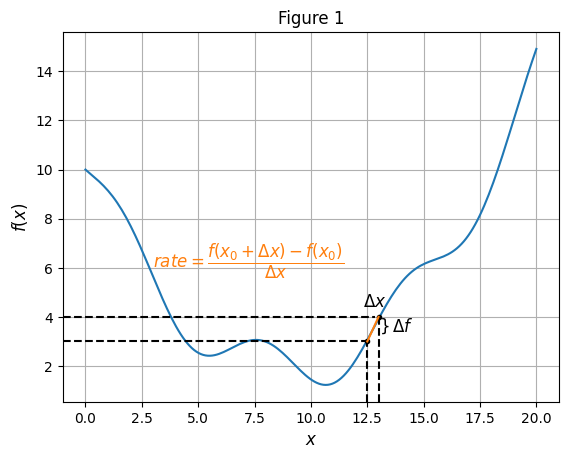

In [2]:
x = tf.linspace(0, 20, 200)

f = lambda x: 0.1*x**2 - 1.8*x + tf.sin(x) + 10

plt.title("Figure 1")
plt.plot(x, f(x))

plt.axhline(y=4, xmin=0, xmax=0.63, ls='--', c='black')
plt.axhline(y=3, xmin=0, xmax=0.62, ls='--', c='black')

plt.axvline(x=12.5, ymin=0, ymax=0.17, ls='--', c='black')
plt.axvline(x=13.0, ymin=0, ymax=0.23, ls='--', c='black')

plt.text(x=13.0, y=3.4, s="$\}\,\Delta f$", fontsize=12)
plt.text(x=12.3, y=4.4, s="$\Delta x$", fontsize=12)

plt.text(x=3, y=6, s="$rate = \dfrac{f(x_0+\Delta x) - f(x_0)}{\Delta x}$", c='#ff7f0e', fontsize=12)

plt.plot([12.5, 13.0], [3.0, 4.0], '.', c='black')
plt.plot([12.5, 13.0], [3.0, 4.0], '-', c='#ff7f0e')

plt.ylabel('$f(x)$', fontsize=12)
plt.xlabel('$x$', fontsize=12)
plt.grid()
plt.show()

### __1. The derivative:__
<font size=3>
This approximative approach gives us the discrete measurement of the $f(x)$'s changing rate by the small interval $\Delta x$, but not how $f(x)$ changes by the entire continuous $x$-axis. 

For _continuous_ measurement of the changing rate, we need to diminish the $\Delta x$ into an _infinitesimal interval_ (an infinitely small interval) since in the $\Delta x$ interval there are infinite numbers! That's how we define the __derivative__ of $f(x)$ regarding $x$,
$$
    \frac{df}{dx} = \lim_{\Delta x\to 0} \frac{f(x+\Delta x) - f(x)}{\Delta x} \, ,
$$

when the limit of $\Delta x$ goes to zero, the infinitesimal changing $df(x)$ over the infinitesimal interval $dx$ gives us a continuous function that can also be written as $f'(x) = df/dx$.

#### __1.1 Practical example:__
<font size=3>

Well, it seems fun, but how about a practical example?

A person spent 10 regular steps to go from position $x_1$ to position $x_2$ in 20 seconds, which gives a rate of $(10\, steps)/(20s) = 0.5\, steps/s$. If 1 step is equivalent to 1 meter, this person walked at a velocity of $0.5\, m/s$! Therefore, the (continuous) function of velocity $v(t)$ can be expressed as the derivative of the position $x(t)$ regarding the time $t$, 
$$
    v(t) = \frac{dx}{dt} \, . 
$$
As well as, if this person increases/changes its velocity along the $x$ interval, the changing of $v(t)$ regarding the time is the acceleration 
$$
    a(t) = \frac{dv}{dt} = \frac{d}{dt}\left(\frac{dx}{dt}\right) = \frac{d^2 x}{dt^2} \, ,
$$
which is called as the _second derivative of the position_ $x(t)$! 

This is when Physics becomes really interesting, when we use Calculus to describe Mechanics — nothing has to do with boring high school Physics!

### __1.2 Maximum and minimum:__
<font size=3>
    
Now that we have an idea of how to measure the change of the loss function $\mathcal L$ by changing $\left(W_l^{ij},\, b_l^i\right)$, we want to know how to adjust weights and biases to _optimize_ (minimize/maximize) the loss function.

Back to the $f(x)$ function, we can use the derivative $f'(x)$ to find at which $x$ points the function reaches locals and global max/minimums and where it starts to increase and decrease (the inflection points).
For instance, in Figure 2, when $f(x)$ reaches the minimum at $x_0$, this infinitesimal interval $df = f(x+dx)-f(x)$ is zero! So, we ask, what are those points where $df/dx = 0$?

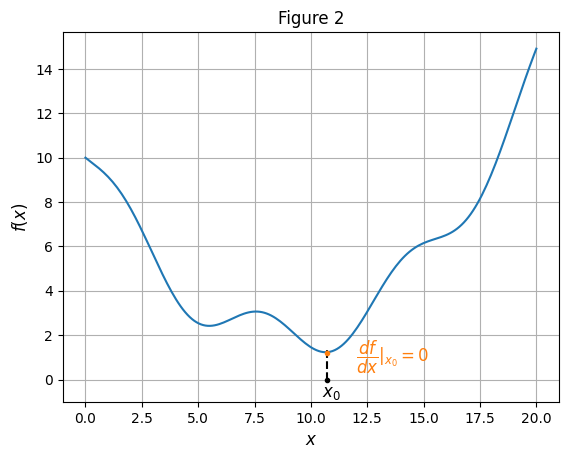

In [3]:
plt.title("Figure 2")
plt.plot(x, f(x))

plt.axvline(x=10.7, ymin=0.06, ymax=0.14, ls='--', c='black')
plt.plot(10.7, 0.0, '.', c='black')
plt.plot(10.7, 1.2, '.', c='#ff7f0e')

plt.text(x=10.5, y=-0.8, s="$x_0$", fontsize=12)
plt.text(x=12.0, y=0.8, s="$\dfrac{df}{dx}|_{x_0} = 0$", c='#ff7f0e', fontsize=12)

plt.ylim(-1.0,)
plt.ylabel('$f(x)$', fontsize=12)
plt.xlabel('$x$', fontsize=12)
plt.grid()
plt.show()

<font size=3>
In Figure 3, the dots in the $f'(x)$ curve (orange) mark values of $x$ where $f'(x) = 0$, which correspond the minimums and maximum of $f(x)$ (blue curve).

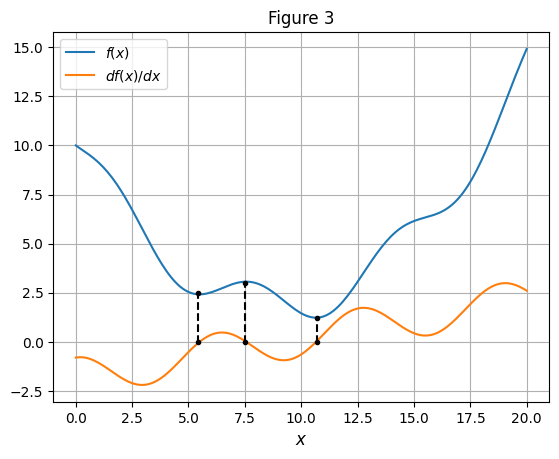

In [4]:
with tf.GradientTape() as tape:
    tape.watch(x)
    y = f(x)
    
df = tape.gradient(y, x)


plt.title("Figure 3")

plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, df, label='$df(x)/dx$')

plt.axvline(x=5.4, ymin=0.16, ymax=0.29, ls='--', c='black')
plt.plot([5.4, 5.4], [0.0, 2.5], '.', c='black')

plt.axvline(x=7.5, ymin=0.16, ymax=0.32, ls='--', c='black')
plt.plot([7.5, 7.5], [0.0, 3.0], '.', c='black')

plt.axvline(x=10.7, ymin=0.16, ymax=0.22, ls='--', c='black')
plt.plot([10.7, 10.7], [0.0, 1.2], '.', c='black')

plt.xlabel('$x$', fontsize=12)
plt.legend()
plt.grid()
plt.show()

<font size=3>
Ok, our one-variable $f(x)$ function is nice to understand the basics, but the loss function has many variables $\left(W_1^{11},\, W_1^{12},\, \dots,\, W_2^{31},\, W_2^{32},\, \dots b_1^1,\, b_1^2,\, \dots\right)$! Let's go in small steps. 

In Calculus, there are some nice derivative operators, which help us to compute many variables elegantly. One of them is the __Gradient operator__!

### __2. The Gradient operator:__
<font size=3>

In Calculus, we express the derivative using different notations depending on what type of operation we are computing. For a multivariable function $f(x,\,y)$, we write the partial derivative of $f$ regarding $x$ as $\partial f(x,y)/\partial x$, or regarding $y$ as $\partial f(x,y)/\partial y$, using the mathematical symbol $\partial$ (_"del"_).

The __gradient operator__ $\vec\nabla$ - written in terms of the $\nabla$ (_"nabla"_) symbol - is a vectorial quantity expressing a function's partial derivatives into axes,
$$
    \vec\nabla f(x,y) = \frac{\partial f}{\partial x}\hat x + \frac{\partial f}{\partial y}\hat y \, .
$$

If we compute $\vec\nabla f(x,y) = 0$, we will obtain the magnitude and direction where the max/minimum values of $f(x,y)$ are!

<br>

To understand how the loss function is a function of weights and biases, let's take the _mean squared error_ function as an example,
$$
    \mathcal L = \left<\left(y^i - \bar y^i\right)^2\right> = \left<\left(y^i - a_L^i\right)^2\right> \, .
$$

In fact, the prediction $\bar y^i$ is the output layer $a^i_L$ (where $L$ if the output layer index), which is a function of weights and biases (for $l=L$),
$$
    a^i_l = \sigma_l\left(W_l^{ij}\,a_{l-1}^j + b_l^i\right) \, ,\quad l = (1,\dots, L)\, .
$$


To simplify the inner parameters notation, we define $\omega_i \equiv \left(W_l^{ij},\, b_l^i\right)$. Figure 4 illustrates a loss função surface considering only two variables $\left(\omega_1,\, \omega_2\right)$.


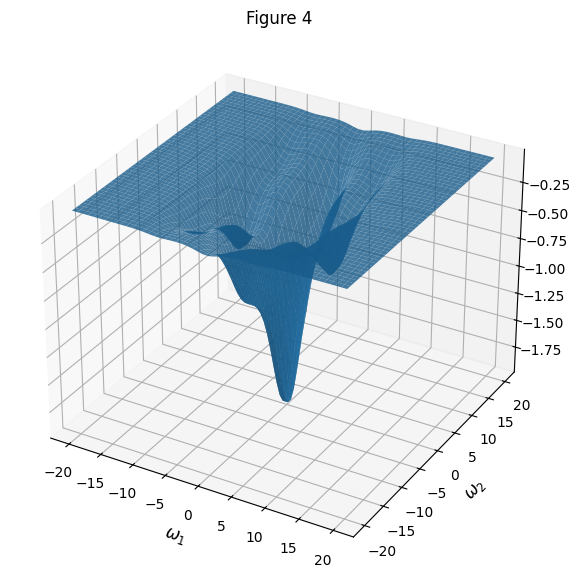

In [5]:
x = tf.linspace(-20, 20, 50)
y = tf.linspace(-20, 20, 50)

ω1, ω2 = tf.meshgrid(x, y)

def loss(ω1, ω2):
    return -tf.exp(-0.02*(ω1**2 + 0.4*ω2**2) + 0.5*tf.cos(0.8*ω1) + 0.2*tf.cos(0.5*ω2))

L = loss(ω1, ω2)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,7))
ax.set_title("Figure 4")
ax.plot_surface(ω1, ω2, L, alpha=0.8)
ax.set_xlabel("$\omega_1$", fontsize=12)
ax.set_ylabel("$\omega_2$", fontsize=12)
plt.show()

<font size=3>

In Figure 5, the gradient $\vec\nabla\mathcal L$ is expressed as the resultant vectors of each point in $(\omega_1,\, \omega_2)$-plane. The vectors point outward to the loss minimum in the plot because it is a negative value.
    
When the model's architecture is defined, weights and biases are set at random, and in the first epoch the loss function is high. To find the best values of $(\omega_1, \omega_2)$ which optimize $\mathcal L$, we apply the $\vec\nabla\mathcal L(\vec\omega) = 0$.

In practice, how do we compute that? By the __Gradient Descent mechanism__.

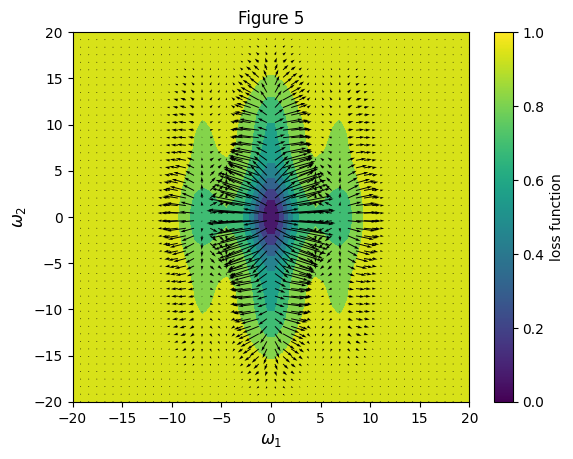

In [6]:
with tf.GradientTape() as tape:
    tape.watch(ω1)
    tape.watch(ω2)
    
    L = loss(ω1, ω2)
    
dL = tape.gradient(L, [ω1, ω2])


plt.title("Figure 5")
plt.contourf(ω1, ω2, L)
plt.quiver(ω1, ω2, dL[0], dL[1])
plt.xlabel("$\omega_1$", fontsize=12)
plt.ylabel("$\omega_2$", fontsize=12)
plt.colorbar(label='loss function')
plt.show()

### __3. The Gradient Descent mechanism:__
<font size=3>
    
To give a mathematical motivation for how we adjust weights and biases, we recall physics again!

In Physics, a field (such as the gravitational field $\vec g$, eletric field $\vec E$, magnetic field $\vec B$) is a vectorial quantity that can be expressed in terms of the gradient of a scalar function, the _potential_. Then, the gravitational field can be written as $\vec g = -\vec\nabla\phi$.

Since the gravitational field $\vec g$ is the acceleration $\vec a$ of a particle attracted by a mass $m$, we can approximate the derivative of velocity,
\begin{align}
    &\frac{\vec v(t+\Delta t) - \vec v(t)}{\Delta t} \approx -\vec\nabla\phi \, ,\\
    &\vec v(t+\Delta t) \approx \vec v(t) - \Delta t\,\vec\nabla\phi \, .
\end{align}

Here, the velocity vector $v(t)$ at time $t$ is adjusted to the time $t+\Delta t$ by the gradient of the potential $\phi$. As an _analogy_, the weights and biases represented by $\omega_i$ can be adjusted by the __gradient descent__ as
$$
    \vec\omega \rightarrow \vec\omega - \eta\,\vec\nabla\mathcal L\, ,
$$
where "$\rightarrow$" means "(something) becomes to," and $\eta$ is a hyperparameter (a parameter with a default value) called the __learning rate__.

Generally, the learning rate is set by default as $\eta = 0.01$. This is a tricky parameter since if we increase its value $\omega_i$'s optimum cannot be found, since it will jump from one value to another without reaching the optimum loss. On the other hand, if $\eta$ is too small, the adjusting can take a long time, and $\omega_i$ can be tucked into a max/minimum local. 

Don't worry about the learning rate parameter because the gradient descent mechanism is just the simplest mechanism that we are studying to understand how an NN learns. There are other mechanisms that automatically adjust $\eta$ to improve optimization (that we will use in our models in Keras).


### __4. The Stochastic Gradient Descent (SGD):__
<font size=3>

In a supervised learning case, the dataset is a group of $(\vec x_1,\, \vec x_2,\, \dots,\, \vec x_n)$ and $(\vec y_1,\, \vec y_2,\, \dots,\, \vec y_n)$. From the gradient descent equation, weights and biases are adjusted for each pair of $(\vec x,\,\vec y)$ data. When all $n$ pairs go through the NN (making $n$ adjustments), we have _one epoch_. Thus, we continue the optimization for as many epochs as possible until learning saturation or the loss worsens.

To speed up the NN's learning we can, instead of making $n$ adjustments, we can group the data into batches so that _one-batch_ $= [(\vec x_1,\, \vec x_2,\, \dots,\, \vec x_m), \, (\vec y_1,\, \vec y_2,\, \dots,\, \vec y_m)]$, where $m$ is the __batch-size__ (see the illustration below).

<center>
<img src="figs/batches.png" width="350"/>
</center>

So, now the input vector $a_0^i$ becomes a matrix $a_0^{ik}$ for $k = (1,\,\dots,\, m)$, and the dense layers are computed as
$$
    a^{ik}_l = \sigma_l\left(W_l^{ij}\,a_{l-1}^{jk} + b_l^i\right) \, .
$$

To apply the gradient descent, we don't need to make $n$ adjustments but $(n/m)$ adjustments, since now we compute the average of $\vec\nabla\mathcal L$ over $m$-batches,
\begin{align}
    &\mathcal L_{total} = \left<\left(y^i - a_L^i\right)^2\right> \rightarrow \frac{1}{m}\sum_{k=1}^m\left<\left(y^{ik} - a_L^{ik}\right)^2\right> = \frac{1}{m}\sum_{k=1}^m\mathcal L_k = \left<\mathcal L\right>_m \, ,\\
    &\vec\nabla\mathcal L_{total} = \vec\nabla\left<\mathcal L\right>_m = \left<\vec\nabla\mathcal L\right>_m \, ,
\end{align}
thus, the gradient descent becomes
$$
    \vec\omega \rightarrow \vec\omega - \eta\,\left<\vec\nabla\mathcal L\right>_m\, .
$$
This adapted method is known as __Stochastic Gradient Descent (SGD)__. The "stochastic" part comes from the shuffling we do before packing the data into $m$ batches.

### __5. The Backpropagation algorithm:__
<font size=3>

Everything seems nice, but how is the loss function gradient computed? 

Let's redefine the dense layer function as $a_l^i = \sigma_l(c_l^i)$, where $c_l^i = W_l^{ij}\,a_{l-1}^j + b_l^i$ is the linear perceptron. Remembering that $\omega_i = \left(W_l^{ij},\, b_l^i\right)$, the loss function gradient can be
$$
    \vec\nabla\mathcal L = \left(\frac{\partial\mathcal L}{\partial\omega_1},\, \frac{\partial\mathcal L}{\partial\omega_2},\,\dots\right) \, ,
$$
such that each component is computed as
\begin{align}
    &\frac{\partial\mathcal L}{\partial\omega_i} = \frac{\partial\mathcal L}{\partial a_l^i}\left(\frac{\partial\mathcal a_l^i}{\partial\omega_i}\right) = \frac{\partial\mathcal L}{\partial a_l^i}\left(\frac{\partial \sigma_l}{\partial c_l^i}\frac{\partial c_l^i}{\partial \omega_i}\right) = \gamma_l^i \frac{\partial c_l^i}{\partial \omega^i} \, ;\quad l = L \, ,\\
    &\gamma_l^i \equiv \frac{\partial \mathcal L}{\partial c_l^i} = \frac{\partial \mathcal L}{\partial a_l^i}\sigma'_l\left(c_l^i\right) \, .
\end{align}

Now, let's compute weights and biases separately,
\begin{align}
    \vec\nabla\mathcal L &= \left(\frac{\partial\mathcal L}{\partial W_l^{ij}},\, \frac{\partial\mathcal L}{\partial b_l^i}\right) \, ,\\\\
    \frac{\partial \mathcal L}{\partial W_l^{ij}} &= \gamma_l^i\frac{\partial c_l^i}{\partial W_l^{ij}} = \gamma_l^i\frac{\partial }{\partial W_l^{ij}}\left(W_l^{ik}\,a_{l-1}^k + b_l^i\right) = \gamma_l^i\,\delta^{jk}\,a_{l-1}^k = \gamma_l^i\, a_{l-1}^j \, ;\quad l = L\, ,\\
    \frac{\partial \mathcal L}{\partial b_l^i} &= \gamma_l^i\frac{\partial c_l^i}{\partial b_l^i} = \gamma_l^i\frac{\partial }{\partial b_l^i}\left(W_l^{ik}\,a_{l-1}^k + b_l^i\right) = \gamma_l^i \, ;\quad l = L\, .
\end{align}

Take a breath and have a look: the above computation regards the layer $l=L$, because, _e.g._, the MSE loss gradient is given by
$$
    \frac{\partial\mathcal L}{\partial \omega_i} = \frac{\partial }{\partial \omega_i}\left<\left[y^i - a_L^i(\omega_i)\right]^2\right> = -2\left<y^i - a_L^i(\omega_i)\right>\frac{\partial a_L^i(\omega_i)}{\partial \omega_i} \, .
$$

To include all layers (__back__ to $l=L$) into the gradient computation, we make the following trick,
\begin{align}
    \gamma_l^i &= \frac{\partial\mathcal L}{\partial c_l^i} = \frac{\partial\mathcal L}{\partial c_{l+1}^k}\frac{\partial c_{l+1}^k}{\partial c_l^i} = \gamma_{l+1}^k\frac{\partial }{\partial c_l^i}\left(W_{l+1}^{kj}\,a_l^j + b_{l+1}^k\right) \, ;\quad a_l^j = \sigma_l\left(c_l^j\right) \, ,\\
    &= \gamma_{l+1}^k\,W_{l+1}^{kj}\,\sigma'_l\left(c_l^j\right)\,\delta^{ij} = \gamma_{l+1}^k\,W_{l+1}^{ki}\,\sigma'_l\left(c_l^i\right) \, .
\end{align}

<br>

Because we compute $\vec\nabla\mathcal L$ by taking the contribution of each layer _backwardly_, $l=(L,\, L-1,\, \dots\, 1)$, this method is the so-called __Backpropagation algorithm__.

### __In summary__:
<font size=3>
    
We compute the loss function gradient using
$$
    \vec\nabla\mathcal L = \left(\frac{\partial\mathcal L}{\partial W_l^{ij}},\, \frac{\partial\mathcal L}{\partial b_l^i}\right) \, ,
$$
such that each contribution is given by the __backpropagation algorithm__,
\begin{align}
     \frac{\partial\mathcal L}{\partial W_l^{ij}} &= \gamma_l^i\,a_{l-1}^j \, , \\
     \frac{\partial\mathcal L}{\partial b_l^i} &= \gamma_l^i \, ,\\
\end{align}
where
\begin{align}
    \gamma_l^i &= 
    \begin{bmatrix}
        \dfrac{\partial\mathcal L}{\partial a_l^i}\,\sigma'\left(c^i_l\right) \, ,\quad l = L \\
        \gamma_{l+1}^k\,W_{l+1}^{ki}\,\sigma'\left(c^i_l\right) \, ,\quad l \neq L
     \end{bmatrix} \, ,
\end{align}
considering a __dense layer__,
$$
    a_l^i = \sigma_l\left(W_l^{ij}\,a_{l-1}^j + b_l^i\right) \, .
$$

With these ingredients, we compute the __stochastic gradient descent__, $\vec\omega \rightarrow \vec\omega - \eta\,\left<\vec\nabla\mathcal L\right>_m$, to adjust weights and biases as
\begin{align}
    W_l^{ij} &\rightarrow W_l^{ij} - \eta\,\left<\frac{\partial\mathcal L}{\partial W_l^{ij}}\right>_m \, ,\\\\
    b_l^i &\rightarrow b_l^i - \eta\,\left<\frac{\partial\mathcal L}{\partial b_l^i}\right>_m \, .
\end{align}

<br>

Now, you know everything! __DO NOT__ call deep learning a __black box__, because this box is now open!!!

### __References:__
<font size=3>
    
Please take a look at these four videos that explain our study topics through nice animations:
 * [But what is an neural network?](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=2&t=216s)
 * [Gradient descent, how neural networks learn.](https://www.youtube.com/watch?v=IHZwWFHWa-w&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=3)
 * [What is backpropagation really doing?](https://www.youtube.com/watch?v=Ilg3gGewQ5U&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=4)
 * [Backpropagation calculus.](https://www.youtube.com/watch?v=tIeHLnjs5U8&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=5)